In [4]:
# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph

In [2]:
hard_sales_df = hs.load_hard_sales()
hard_sales_df

,weekly_id,begin_date,end_date,report_date,period_date,hw,units,year,month,mday,week,delta_day,delta_week,delta_month,delta_year,avg_units,sum_units,launch_date,maker_name,full_name
0,1998-10-18_GB,1998-10-12,1998-10-18,1998-10-18,7,GB,10867,1998,10,18,42,3467,495,114,9,1552,10867,1989-04-21,Nintendo,GAME BOY
1,1998-10-18_N64,1998-10-12,1998-10-18,1998-10-18,7,N64,2965,1998,10,18,42,847,121,28,2,423,2965,1996-06-23,Nintendo,NINTENDO64
2,1998-10-18_PS,1998-10-12,1998-10-18,1998-10-18,7,PS,20918,1998,10,18,42,1415,202,46,4,2988,20918,1994-12-03,SONY,PlayStation
3,1998-10-18_SATURN,1998-10-12,1998-10-18,1998-10-18,7,SATURN,858,1998,10,18,42,1426,203,47,4,122,858,1994-11-22,SEGA,SEGA SATURN
4,1998-10-25_GB,1998-10-19,1998-10-25,1998-10-25,7,GB,163017,1998,10,25,43,3474,496,114,9,23288,173884,1989-04-21,Nintendo,GAME BOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8444,2025-08-03_NS2,2025-07-28,2025-08-03,2025-08-03,7,NS2,62733,2025,8,3,31,59,8,2,0,8961,1677123,2025-06-05,Nintendo,Nintendo Switch2
8445,2025-08-03_NSW,2025-07-28,2025-08-03,2025-08-03,7,NSW,18637,2025,8,3,31,3075,439,101,8,2662,35869618,2017-03-03,Nintendo,Nintendo Switch
8446,2025-08-03_PS4,2025-07-28,2025-08-03,2025-08-03,7,PS4,19,2025,8,3,31,4180,597,138,11,2,9490707,2014-02-22,SONY,PlayStation4
8447,2025-08-03_PS5,2025-07-28,2025-08-03,2025-08-03,7,PS5,7141,2025,8,3,31,1725,246,57,5,1020,6946379,2020-11-12,SONY,PlayStation5


In [3]:
maker_df = hs.pivot_maker(hard_sales_df)
maker_df

maker_name,BANDAI,Microsoft,Nintendo,SEGA,SNK,SONY
report_date,,,,,,
1998-10-18,NaN,NaN,13832.0,858.0,NaN,20918.0
1998-10-25,NaN,NaN,166830.0,1061.0,NaN,21151.0
1998-11-01,NaN,NaN,75466.0,1027.0,21471.0,20128.0
1998-11-08,NaN,NaN,57548.0,824.0,4688.0,27171.0
1998-11-15,NaN,NaN,42699.0,1144.0,3165.0,23575.0
...,...,...,...,...,...,...
2025-07-06,NaN,529.0,146355.0,NaN,NaN,8650.0
2025-07-13,NaN,247.0,85296.0,NaN,NaN,7292.0
2025-07-20,NaN,150.0,163931.0,NaN,NaN,6170.0


In [4]:
maker_df.index

DatetimeIndex(['1998-10-18', '1998-10-25', '1998-11-01', '1998-11-08',
               '1998-11-15', '1998-11-22', '1998-11-29', '1998-12-06',
               '1998-12-13', '1998-12-20',
               ...
               '2025-06-01', '2025-06-08', '2025-06-15', '2025-06-22',
               '2025-06-29', '2025-07-06', '2025-07-13', '2025-07-20',
               '2025-07-27', '2025-08-03'],
              dtype='datetime64[ns]', name='report_date', length=1399, freq=None)

In [5]:
maker_df.resample('M').sum()

maker_name,BANDAI,Microsoft,Nintendo,SEGA,SNK,SONY
report_date,,,,,,
1998-10-31,0.0,0.0,180662.0,1919.0,0.0,42069.0
1998-11-30,0.0,0.0,367056.0,105013.0,32963.0,115308.0
1998-12-31,0.0,0.0,906693.0,168605.0,7675.0,332964.0
1999-01-31,0.0,0.0,697654.0,183316.0,8430.0,445727.0
1999-02-28,0.0,0.0,224611.0,73444.0,2819.0,487327.0
...,...,...,...,...,...,...
2025-04-30,0.0,1710.0,113513.0,0.0,0.0,39065.0
2025-05-31,0.0,3467.0,106506.0,0.0,0.0,32109.0
2025-06-30,0.0,1400.0,1247781.0,0.0,0.0,63640.0


In [6]:
maker_df.resample('Y').sum()

maker_name,BANDAI,Microsoft,Nintendo,SEGA,SNK,SONY
report_date,,,,,,
1998-12-31,0.0,0.0,1454411.0,275537.0,40638.0,490341.0
1999-12-31,684517.0,0.0,3347393.0,968639.0,141736.0,4651903.0
2000-12-31,508263.0,0.0,2345151.0,397661.0,117929.0,4693358.0
2001-12-31,298348.0,0.0,5776430.0,287247.0,14968.0,3701766.0
2002-12-31,220300.0,329584.0,4504070.0,4966.0,0.0,3960503.0
2003-12-31,46366.0,95226.0,4613243.0,0.0,0.0,3050841.0
2004-12-31,600.0,34932.0,4227133.0,0.0,0.0,3109689.0
2005-12-31,0.0,97300.0,5495825.0,0.0,0.0,4296282.0
2006-12-31,0.0,205977.0,10506980.0,0.0,0.0,3990548.0


In [7]:
handheld_df = hs.pivot_maker(hard_sales_df, hw=['GB', 'GBA', 'DS', '3DS', 'NSW', 'NS2', 
                                                'PSP', 'Vita',
                                                'WS', 'NeoGeoP'])
handheld_df.resample('Y').sum()

maker_name,BANDAI,Nintendo,SNK,SONY
report_date,,,,
1998-12-31,0.0,1058864.0,40638.0,0.0
1999-12-31,684517.0,2606884.0,141736.0,0.0
2000-12-31,508263.0,2077410.0,117929.0,0.0
2001-12-31,298348.0,4774048.0,14968.0,0.0
2002-12-31,220300.0,3467665.0,0.0,0.0
2003-12-31,46366.0,3600549.0,0.0,0.0
2004-12-31,600.0,3609350.0,0.0,349283.0
2005-12-31,0.0,5190930.0,0.0,2194008.0
2006-12-31,0.0,9417066.0,0.0,1969363.0


In [8]:
console_df = hs.pivot_maker(hard_sales_df, hw=['PS', 'PS2', 'PS3', 'PS4', 'PS5', 
                                               'Xbox', 'XB360', 'XBOne', 'XSX', 
                                               'N64', 'GC', 'Wii', 'WiiU', 'NSW', 'NS2',
                                               'SATURN', 'DC'])
console_df.resample('Y').sum()

maker_name,Microsoft,Nintendo,SEGA,SONY
report_date,,,,
1998-12-31,0.0,395547.0,275537.0,490341.0
1999-12-31,0.0,740509.0,968639.0,1928146.0
2000-12-31,0.0,267741.0,397661.0,3710707.0
2001-12-31,0.0,1002382.0,287247.0,3529117.0
2002-12-31,329584.0,1036405.0,4966.0,3960503.0
2003-12-31,95226.0,1012694.0,0.0,3050841.0
2004-12-31,34932.0,617783.0,0.0,2760406.0
2005-12-31,97300.0,304895.0,0.0,2102274.0
2006-12-31,205977.0,1089914.0,0.0,2021185.0


In [9]:
active_makers = ['Nintendo', 'SONY', 'Microsoft']
active_sales_df = hard_sales_df[hard_sales_df['maker_name'].isin(active_makers)]
active_sales_df

,weekly_id,begin_date,end_date,report_date,period_date,hw,units,year,month,mday,week,delta_day,delta_week,delta_month,delta_year,avg_units,sum_units,launch_date,maker_name,full_name
0,1998-10-18_GB,1998-10-12,1998-10-18,1998-10-18,7,GB,10867,1998,10,18,42,3467,495,114,9,1552,10867,1989-04-21,Nintendo,GAME BOY
1,1998-10-18_N64,1998-10-12,1998-10-18,1998-10-18,7,N64,2965,1998,10,18,42,847,121,28,2,423,2965,1996-06-23,Nintendo,NINTENDO64
2,1998-10-18_PS,1998-10-12,1998-10-18,1998-10-18,7,PS,20918,1998,10,18,42,1415,202,46,4,2988,20918,1994-12-03,SONY,PlayStation
4,1998-10-25_GB,1998-10-19,1998-10-25,1998-10-25,7,GB,163017,1998,10,25,43,3474,496,114,9,23288,173884,1989-04-21,Nintendo,GAME BOY
5,1998-10-25_N64,1998-10-19,1998-10-25,1998-10-25,7,N64,3813,1998,10,25,43,854,122,28,2,544,6778,1996-06-23,Nintendo,NINTENDO64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8444,2025-08-03_NS2,2025-07-28,2025-08-03,2025-08-03,7,NS2,62733,2025,8,3,31,59,8,2,0,8961,1677123,2025-06-05,Nintendo,Nintendo Switch2
8445,2025-08-03_NSW,2025-07-28,2025-08-03,2025-08-03,7,NSW,18637,2025,8,3,31,3075,439,101,8,2662,35869618,2017-03-03,Nintendo,Nintendo Switch
8446,2025-08-03_PS4,2025-07-28,2025-08-03,2025-08-03,7,PS4,19,2025,8,3,31,4180,597,138,11,2,9490707,2014-02-22,SONY,PlayStation4
8447,2025-08-03_PS5,2025-07-28,2025-08-03,2025-08-03,7,PS5,7141,2025,8,3,31,1725,246,57,5,1020,6946379,2020-11-12,SONY,PlayStation5


In [10]:


marker_sales_df = active_sales_df.pivot_table(
    index='report_date',
    columns='maker_name',
    values='units',
    aggfunc='sum'
)

marker_sales_df


maker_name,Microsoft,Nintendo,SONY
report_date,,,
1998-10-18,NaN,13832.0,20918.0
1998-10-25,NaN,166830.0,21151.0
1998-11-01,NaN,75466.0,20128.0
1998-11-08,NaN,57548.0,27171.0
1998-11-15,NaN,42699.0,23575.0
...,...,...,...
2025-07-06,529.0,146355.0,8650.0
2025-07-13,247.0,85296.0,7292.0
2025-07-20,150.0,163931.0,6170.0


In [2]:
from typing import List, Optional

def pivot_maker(df: pd.DataFrame, begin_year: Optional[int] = None, end_year: Optional[int] = None) -> pd.DataFrame:
    """
    ハードウェアのメーカー別販売データをピボットテーブル形式に変換する

    Parameters
    ----------
    df : pd.DataFrame
        load_hard_sales()で取得した週次販売データ
    begin_year : int, optional
        開始年（デフォルト: None）
    end_year : int, optional
        終了年（デフォルト: None）

    Returns
    -------
    pd.DataFrame
        メーカー別の販売データをピボットテーブル形式に変換したDataFrame
    """
    begin = None if begin_year is None else datetime(begin_year, 1, 1)
    end = None if end_year is None else datetime(end_year, 12, 31)

    df = hs.yearly_maker_sales(df, begin=begin, end=end)
    pivot_df = df.pivot(index='year', columns='maker_name', values='yearly_units')
    
        # カラムの順序を調整
    desired_order = ['Nintendo', 'SONY', 'Microsoft', 'SEGA']
    existing_columns = pivot_df.columns.tolist()
    
    # 指定した順序でカラムを並べ替え
    ordered_columns = []
    for maker in desired_order:
        if maker in existing_columns:
            ordered_columns.append(maker)
    
    # その他のカラムを追加
    other_columns = [col for col in existing_columns if col not in desired_order]
    ordered_columns.extend(other_columns)
    
    return pivot_df[ordered_columns]


maker_sales = pivot_maker(hs.load_hard_sales(), begin_year=2023, end_year=2025)
for i in maker_sales.iterrows():
    print("---", i)


--- (2023, maker_name
Nintendo     4065642
SONY         2660760
Microsoft     141712
Name: 2023, dtype: int64)
--- (2024, maker_name
Nintendo     3109265
SONY         1467877
Microsoft     118221
Name: 2024, dtype: int64)
--- (2025, maker_name
Nintendo     2921255
SONY          551724
Microsoft      24677
Name: 2025, dtype: int64)


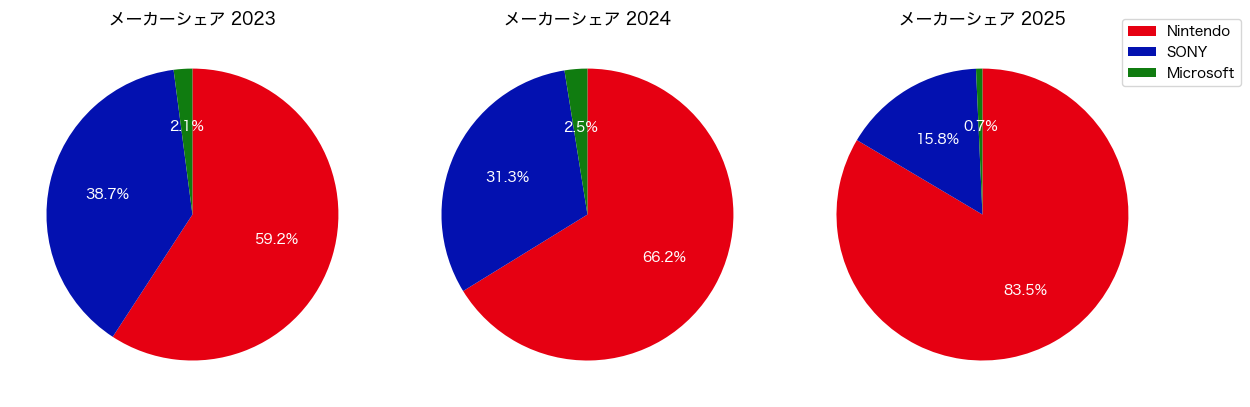

In [3]:
from matplotlib.figure import Figure
from gamedata import hard_info as hi
from typing import Optional, List

def plot_maker_share_pie(begin_year:Optional[int] = None, 
                         end_year:Optional[int] = None) -> tuple[Figure, pd.DataFrame]:
    """
    年ごとのメーカーシェアを円グラフで可視化する

    Parameters
    ----------
    hard_sales_df : pd.DataFrame
        load_hard_sales()で取得した週次販売データ
    start_year : int
        表示する最初の年（デフォルト: 2023）
    """
    df = hs.load_hard_sales()
    maker_sales = hs.pivot_maker(df, begin_year=begin_year, end_year=end_year)

    n = len(maker_sales)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 4))
    plt.rcParams['font.family'] = 'Hiragino Sans'
    plt.rcParams['axes.unicode_minus'] = False

    if n == 1:
        axes = [axes]
    legend_labels = None
    legend_handles = None
    for i, (ax, (idx, s)) in enumerate(zip(axes, maker_sales.iterrows())):
        s_data = s[s > 0]
        colors = hi.get_maker_colors(s_data.index.to_list())
        wedges, texts, autotexts = ax.pie(s_data, labels=None, autopct='%1.1f%%', colors=colors, startangle=90, counterclock=False)
        for autotext in autotexts:
            autotext.set_color('white')
        ax.set_title(f'メーカーシェア {s.name}')
        if i == 0:
            legend_labels = s_data.index.to_list()
            legend_handles = wedges
    if legend_handles and legend_labels:
        fig.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    fig.tight_layout()

    return (fig, maker_sales)

(fig, df) = plot_maker_share_pie(begin_year=2023, end_year=2025)


In [23]:
df

maker_name,Microsoft,Nintendo,SONY
year,,,
2022,269737,4815210,1176877
2023,141712,4065642,2660760
2024,118221,3109265,1467877
2025,24677,2921255,551724


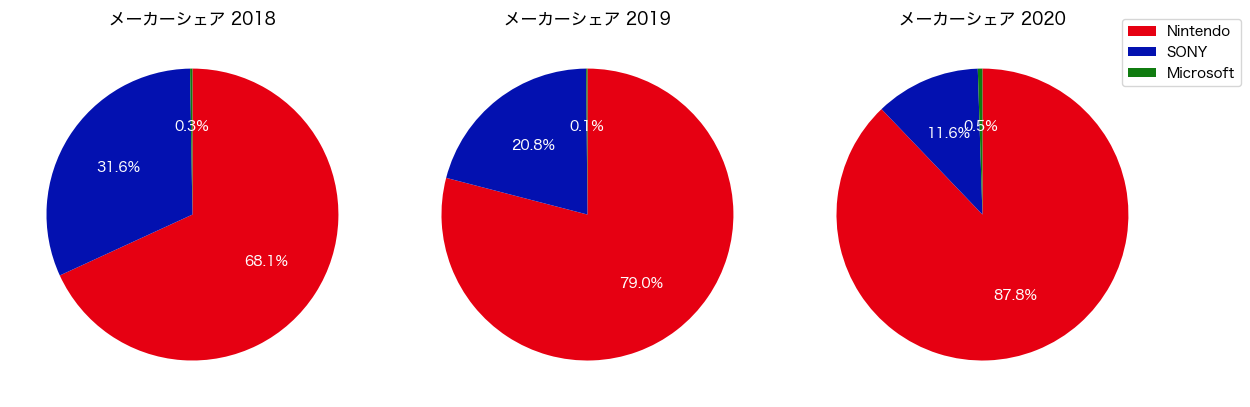

In [9]:
(fig, df) = ph.plot_maker_share_pie(begin_year=2018, end_year=2020)